# Key papers

This Jupyter Notebook can be used to perform basic publication analysis for a science branch. 

**Features:**

1. Subtopic analysis based on co-citation graph clustering:
    * Chord diagram for co-citation graph
    * Comparison of subtopics by size
    * Timeline of each subtopic
    * Extraction of 1,2,3-grams describing each subtopic
2. Detection of highlight papers:
    * Top cited papers overall
    * Detection of most cited papers for each year
    * Detection of papers with max relative citation gain for each year
3. Citation dynamics visualization for highlight papers
4. Subtopic evolution tracking based on co-citation graph clustering for different time periods

## Getting Started

1. Define the `SEARCH_TERMS` variable in the cell below with a list of keywords that describe the science branch of your interest.
2. Run all cells & see the results.

In [1]:
SEARCH_TERMS = ['deep', 'learning']

## Publication Analysis

In [2]:
import logging

from bokeh.plotting import show, output_notebook
from matplotlib import pyplot as plt

from keypaper.pm_loader import PubmedLoader
from keypaper.ss_loader import SemanticScholarLoader
from keypaper.analysis import KeyPaperAnalyzer
from keypaper.visualization import Plotter

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s %(levelname)s: %(message)s')
output_notebook()
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/Nikolay.Kapralov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/Nikolay.Kapralov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/Nikolay.Kapralov/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/Nikolay.Kapralov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading BokehJS ...

2019-07-26 10:32:52,101 DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2019-07-26 10:32:52,106 DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
analyzer = KeyPaperAnalyzer(SemanticScholarLoader(test=False))
log = analyzer.launch(*SEARCH_TERMS)

2019-07-26 10:32:52,118 INFO: Searching publication data
2019-07-26 10:32:52,218 INFO: Found 3199 publications in the local database

2019-07-26 10:32:52,247 INFO: Created table for request with index.
2019-07-26 10:32:52,248 INFO: Started loading citation stats
2019-07-26 10:32:52,273 INFO: Done loading citation stats
2019-07-26 10:32:52,286 INFO: Loaded citation stats for 556 of 3199 articles.
Others may either have zero citations or be absent in the local database.
2019-07-26 10:32:52,287 INFO: Filtering top 100000 or 80% of all the citations
2019-07-26 10:32:52,290 INFO: Calculating co-citations for selected articles
2019-07-26 10:32:52,306 INFO: Loaded 368 lines of citing info
2019-07-26 10:32:52,307 INFO: Found 547 co-cited pairs of articles
2019-07-26 10:32:52,307 INFO: Aggregating co-citations
2019-07-26 10:32:52,327 INFO: Filtering top 100000 of all the co-citations
2019-07-26 10:32:52,387 INFO: Building co-citations graph
2019-07-26 10:32:52,390 INFO: Co-citations graph nodes

2019-07-26 10:33:20,113 INFO: Done

2019-07-26 10:33:20,114 INFO: Identifying top cited papers overall
2019-07-26 10:33:20,116 INFO: Identifying papers with max citation gain for each year
2019-07-26 10:33:20,137 INFO: Identifying papers with max relative citation gain for each year



In [4]:
plotter = Plotter(analyzer)

## Subtopics a.k.a. Clusters in the Co-citation Graph

In [5]:
show(plotter.chord_diagram_components())

2019-07-26 10:33:20,220 INFO: Visualizing components with Chord diagram
/home/Nikolay.Kapralov/pubtrends/models/keypaper/visualization.py:138: RuntimeWarning: invalid value encountered in log
  log_total = np.log(gdf['total'])


In [6]:
show(plotter.component_size_summary())

2019-07-26 10:33:20,308 INFO: Summary component detailed info visualization


In [7]:
plotter.comp_palette

[rgb(57, 59, 121), rgb(181, 207, 107), rgb(173, 73, 74), rgb(222, 158, 214)]

In [8]:
for p in plotter.subtopic_timeline_graphs():
    show(p)

2019-07-26 10:33:20,452 INFO: Per component detailed info visualization
/home/Nikolay.Kapralov/pubtrends/models/keypaper/visualization.py:412: RuntimeWarning: invalid value encountered in log
  size_scaling_coefficient = max_radius_screen_units / np.log(df['total']).max()
/home/Nikolay.Kapralov/pubtrends/models/keypaper/visualization.py:419: RuntimeWarning: invalid value encountered in log
  size=np.log(df['total']) * size_scaling_coefficient))


## Top Cited Papers Overall

In [9]:
show(plotter.top_cited_papers())

## Top Cited Papers for Each Year

In [10]:
show(plotter.max_gain_papers())

2019-07-26 10:33:21,372 INFO: Different colors encode different papers


## Top by Relative Gain for Each Year

In [11]:
show(plotter.max_relative_gain_papers())

2019-07-26 10:33:21,421 INFO: Top papers in relative gain for each year
2019-07-26 10:33:21,422 INFO: Relative gain (year) = Citation Gain (year) / Citations before year
2019-07-26 10:33:21,423 INFO: Different colors encode different papers


## Citation per Year Dynamics

In [12]:
plotter.article_citation_dynamics()

2019-07-26 10:33:21,473 INFO: Choose ID to get detailed citations timeline for top cited / max gain or relative gain papers


In [13]:
analyzer.df

id     crc32id  \
0     fce0f8d3034c16d2ff4b14195189bef2db1099dd  1709632583   
1     fce0f8d3034c16d2ff4b14195189bef2db1099dd  1709632583   
2     d5909f8d82bff4b86cc36ecd000f251c1a76293b  1074460488   
3     d5909f8d82bff4b86cc36ecd000f251c1a76293b  1074460488   
4     652537f9d1c0f41b185fecd0f218a0e37729474f  2087569913   
5     652537f9d1c0f41b185fecd0f218a0e37729474f  2087569913   
6     7e18a0e01fc791957fa540a47c85d212fcbf7121   311041036   
7     7e18a0e01fc791957fa540a47c85d212fcbf7121   311041036   
8     5e4deed61eaf561f2ef2a26f11ce32345ce64981   244013333   
9     5e4deed61eaf561f2ef2a26f11ce32345ce64981   244013333   
10    3499d11df11cbb35036f481231b618e41dbc2e9c  1916178194   
11    3499d11df11cbb35036f481231b618e41dbc2e9c  1916178194   
12    cc7d9ae642307f131fecd07965df9e87c8f6a729  -242444189   
13    cc7d9ae642307f131fecd07965df9e87c8f6a729  -242444189   
14    f8e857063914c58df6d3eec24b79355619cf01d4   483704896   
15    f8e857063914c58df6d3eec24b79355619cf01d4   483704896   
16    c2b90ee397de43ba1bca19141dff7c58d315abe0  1969739777   
17    c2b90ee397de43ba1bca19141dff7c58d315abe0  1969739777   
18    0660234350633963c67def11dad828e39091d7a0  1375506919   
19    a78c755b962f2da7cf90b79e17b0f81d7ef7b38a  1304099381   
20    903c05ba1ae99f6c3caedf9452162f22f24bd28c -1726235110   
21    94ce9fb2e490f580f50f0ce73d57805ed92d5bc6  1949718148   
22    e3e69d473968a50eda71d92ca3e208a7c4be69ae  1946718976   
23    a129a21a28ca98e20943cc223441a27280241a10  -121426266   
24    94abd1d51a1bcb93bf6e7d5b65e2952e9fc38dd2  -115060233   
25    c2e1198ef34a54f17ea8015bdfc787944ef14b79  -213900120   
26    afdbbf96a96203b2b92ddcc3c54b127192174989 -1343375162   
27    bd81d174d2f11927565a270397144e2e557b0773  1103952655   
28    31299732ff98c0db2f2caa146e4288c29c98857e -1947158359   
29    5cdff4928cd606b39f6c03476e7ea33058167738  1824777013   
...                                        ...         ...   
3169  d9e4613c4892382c6dd7f222fcdf6dc16d689c71  1936468016   
3170  72e0cb0c02b06768756bba5b93ed745bf3c23a22  1945871273   
3171  638acdc3e953750e2d5c2b33e27fcee94047117f  1946303782   
3172  818f63036b4a4a9b4b6b9db5ff96255726196c05  1953607444   
3173  e13341d7bc06860f9c37f340073dc9e8b5f21856  1969051218   
3174  dbcc7bf199898d06b4ef07ae6e0728c7c708b1bc  1974637372   
3175  ddd2d1562a69b63400be81eb6eb4a047e75aa7a9  1979030309   
3176  6dce48bd1a98e1faa70590b80bf1ada4d56abf65  1984423442   
3177  bae4613341ac74bd30099cb416cd8b0aebdfc2f7  1984854098   
3178  bae4613341ac74bd30099cb416cd8b0aebdfc2f7  1984854098   
3179  64e3843d5b3305024fbba49f9921f7693203c4e1  2001901555   
3180  64e3843d5b3305024fbba49f9921f7693203c4e1  2001901555   
3181  93d1a88850975a725713bb79b298514d0e52b223  2011970667   
3182  50584577dd985f26926a4e5b5935b403745ac70a  2028835145   
3183  91ea41c4f90842a52311a342a989d2ff342a67c7  2037942364   
3184  e0472b39b63e80767da7b5765e2219b55d0309cb  2044829157   
3185  43e77b5157b0fa0f365808e26af287c3164e002f  2044833740   
3186  199f6d0f9b8b3660c9b08c1c1d4d2de793a7d734  2046082086   
3187  560443ec277f116b73b6182e77dcffbfe4cd7bea  2067052957   
3188  ef87c699a39477d5d1d3fe0970f2dace71eb4d02  2093081265   
3189  21e4606a7a61ea0492837eb18ebfda971f314e27  2094916927   
3190  4adb97f155fa9ab8a1d3128db4b00a7812349e5b  2106065864   
3191  218ab986573e0a0703bd0d96fdec81fb9fe001e9  2111139904   
3192  a84e03b5a7cd00864c8090ae69555d600d044255  2112187579   
3193  7ccd7c423282d6e415942bdd25e1c732fa898578  2114165520   
3194  353a89c277cca3e3e4e8c6a199ae3442cdad59b5  2121723128   
3195  8c37f47f0b8b58ef0c18af35f7df3fbd3e18fea6  2126243329   
3196  b5f071da79d0d913f828dd08426b918f80099094  2128725058   
3197  36d71b97cee9544fa507899719635ca679413f60  2131390877   
3198  60d25d3d80abbcae75eed8a2d97e2a5787a380fe  2132252320   

                                                  title  \
0     A Proposal for Qualitative Relevance Feedback ...   
1     A Proposal for Qualitative Relevance Feedback ...   
2     High-fidelity fa

## Component Evolution

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
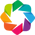

In [14]:
import math
import holoviews as hv
hv.extension('bokeh')

import pandas as pd

In [15]:
from keypaper.utils import get_tfidf_words

CG, components_merged = analyzer.subtopic_evolution_analysis(steps=3, min_papers=0)
evol = plotter.analyzer.evolution_df.copy()
evol = evol.reset_index().rename(columns={'index': 'id'})
evol['id'] = evol['id'].astype(str)

kwds = {}
for col in evol:
    if isinstance(col, (int, float)):
        evol[col] = evol[col].apply(int)
        comps = dict(evol.groupby(col)['id'].apply(list))
        kwds[col] = get_tfidf_words(analyzer.df, comps, analyzer.terms)

2019-07-26 10:33:22,401 INFO: Studying evolution of subtopic clusters in 2001 - 2018 in 3 steps
2019-07-26 10:33:22,402 INFO: Years when subtopics are studied: 2009, 2001
2019-07-26 10:33:22,443 INFO: 2018: graph contains 229 nodes, 314 edges
2019-07-26 10:33:22,526 INFO: Merging components smaller than 0.05 to "Other" component
2019-07-26 10:33:22,528 INFO: Reassigning components
2019-07-26 10:33:22,528 INFO: Processed 4 components
2019-07-26 10:33:22,546 INFO: 2009: graph contains 4 nodes, 4 edges
2019-07-26 10:33:22,547 INFO: Merging components smaller than 0.05 to "Other" component
2019-07-26 10:33:22,547 INFO: All components are bigger than 0.05, no need to reassign
2019-07-26 10:33:22,582 INFO: 2001: graph contains 1 nodes, 1 edges
2019-07-26 10:33:22,583 INFO: Merging components smaller than 0.05 to "Other" component
2019-07-26 10:33:22,583 INFO: All components are bigger than 0.05, no need to reassign
/home/Nikolay.Kapralov/pubtrends/models/keypaper/analysis.py:267: FutureWarni

In [16]:
cols = evol.columns[2:]
pairs = list(zip(cols, cols[1:]))
nodes = set()
edges = []
mapping = {}

for now, then in pairs:
    nodes_now = [f'{now} {c}' for c in evol[now].unique()]
    nodes_then = [f'{then} {c}' for c in evol[then].unique()]
   
    inner = {node : 0 for node in nodes_then}
    changes = {node : inner.copy() for node in nodes_now}
    for pmid, comp in evol.iterrows():
        c_now, c_then = comp[now], comp[then]
        changes[f'{now} {c_now}'][f'{then} {c_then}'] += 1
            
    for v in nodes_now:
        for u in nodes_then:
            if changes[v][u] > 0:
                edges.append((v, u, changes[v][u]))
                nodes.add(v)
                nodes.add(u)

In [17]:
def sort_nodes_key(node):
    year, c = node[0].split(' ')
    return (int(year), -int(c))

nodes_data = []

for node in nodes:
    year, c = node.split(' ')
    if int(c) >= 0:
        label = f"{year} {', '.join(kwds[int(year)][int(c)])}"
    else:
        label = f"Published after {year}"
    nodes_data.append((node, label))
nodes_data = sorted(nodes_data, key=sort_nodes_key, reverse=True)

nodes_ds = hv.Dataset(nodes_data, 'index', 'label')

In [18]:
node_color = {}

for node in nodes:
    node_color[node] = 'blue'

In [19]:
from holoviews import dim

value_dim = hv.Dimension('Amount', unit=None)
topic_evolution = hv.Sankey((edges, nodes_ds), ['From', 'To'], vdims=value_dim)
topic_evolution.opts(labels='label', height=600, show_values=False, cmap='tab20',
                     edge_color=dim('To').str(), node_color=dim('index').str())

:Sankey   [From,To]   (Amount)

## PageRank for Citation Analysis

In [20]:
analyzer.loader.load_citations()

2019-07-26 10:33:29,184 INFO: Started loading raw information about citations
2019-07-26 10:33:30,440 INFO: Done loading citations, building citation graph
2019-07-26 10:33:30,442 INFO: Built citation graph - nodes 623 edges 537


In [21]:
import networkx as nx

analyzer.G = analyzer.loader.G
# Apply PageRank algorithm with damping factor of 0.5
pr_nx = nx.pagerank(analyzer.G, alpha=0.5, tol=1e-9)

In [22]:
ancestor = dict.fromkeys(analyzer.G, (0, 0))

# Select ancestor with highest PR for each node
for v in analyzer.G:
    for u in analyzer.G[v]:
        anc, pr = ancestor[u]
        if pr_nx[v] > pr:
            ancestor[u] = (v, pr_nx[v])

In [23]:
PRG = nx.DiGraph()
for v, anc in ancestor.items():
    u, pr = anc
    if pr > 0:
        PRG.add_edge(u, v)

In [24]:
start, end = zip(*list(PRG.edges()))

In [25]:
from bokeh.plotting import figure
from bokeh.models import GraphRenderer, StaticLayoutProvider, Circle, HoverTool, MultiLine
from bokeh.models.graphs import NodesAndLinkedEdges

node_indices = list(filter(lambda node: len(analyzer.df[analyzer.df['id'] == node]) > 0, list(PRG.nodes())))

years = []
year_counts = {}
titles = []
pageranks = []
size = []
for node in node_indices:
    sel = analyzer.df[analyzer.df['id'] == node]
    year = sel['year'].values[0]
    
    if not year in year_counts:
        year_counts[year] = 1
    else:
        year_counts[year] += 1
    years.append(year)
    
    titles.append(sel['title'].values[0])
    pageranks.append(pr_nx[node] * 100)
    size.append(pr_nx[node] * 1000)
max_year_count = max(list(year_counts.values()))
min_year, max_year = min(years), max(years)

plot = figure(title="PageRank applied to citation filtering", 
              x_range=(min_year - 1, max_year+1), y_range=(0, max_year_count + 1),
              tools="", toolbar_location=None)

TOOLTIPS = """
    <div style="max-width: 320px">
        <div>
            <span style="font-size: 12px; font-weight: bold;">@title</span>
        </div>
        <div>
            <span style="font-size: 11px;">Year</span>
            <span style="font-size: 10px;">@year</span>
        </div>
        <div>
            <span style="font-size: 11px;">PMID</span>
            <span style="font-size: 10px;">@id</span>
        </div>
        <div>
            <span style="font-size: 11px;">PageRank</span>
            <span style="font-size: 10px;">@pagerank</span>
        </div>
    </div>
"""

plot.add_tools(HoverTool(tooltips=TOOLTIPS))

graph = GraphRenderer()

graph.node_renderer.data_source.add(node_indices, 'index')
graph.node_renderer.data_source.data['id'] = node_indices
graph.node_renderer.data_source.data['year'] = years
graph.node_renderer.data_source.data['title'] = titles
graph.node_renderer.data_source.data['pagerank'] = pageranks
graph.node_renderer.data_source.data['size'] = size
# graph.edge_renderer.data_source.data = dict(start=start, end=end)

### start of layout code   
x = [analyzer.df[analyzer.df['id'] == pmid]['year'].values[0] for pmid in node_indices]
y = []
tmp_year_counts = {}
for node in node_indices:
    year = analyzer.df[analyzer.df['id'] == node]['year'].values[0]
    if not year in tmp_year_counts:
        tmp_year_counts[year] = 1
    else:
        tmp_year_counts[year] += 1
    y.append(tmp_year_counts[year])

graph_layout = dict(zip(node_indices, zip(x, y)))
graph.layout_provider = StaticLayoutProvider(graph_layout=graph_layout)

graph.node_renderer.glyph = Circle(size='size', fill_color='blue')
graph.node_renderer.hover_glyph = Circle(size='size', fill_color='green')

# graph.edge_renderer.glyph = MultiLine(line_color='black', line_alpha=1, line_width=1)
# graph.edge_renderer.hover_glyph = MultiLine(line_color='green', line_width=2)

graph.inspection_policy = NodesAndLinkedEdges()

plot.min_border_left = 75
plot.renderers.append(graph)

show(plot)

### Top Papers by PageRank

In [26]:
for pmid, pagerank in sorted(pr_nx.items(), key=lambda el: el[1], reverse=True)[:10]:
    print(f"{(100*pagerank):.2f} {analyzer.df[analyzer.df['id'] == pmid]['title'].values[0]}")

0.35 Deep Learning and Medical Diagnosis : A Review of Literature
0.32 Danger-aware Weighted Advantage Composition of Deep Reinforcement Learning for Robot Navigation
0.31 A hybrid deep learning model for consumer credit scoring
0.30 Review of Deep Learning Methods in Mammography, Cardiovascular, and Microscopy Image Analysis
0.29 CS-CNN: Enabling Robust and Efficient Convolutional Neural Networks Inference for Internet-of-Things Applications
0.28 ESIM: an Open Event Camera Simulator
0.28 Deep Reinforcement Learning for Unsupervised Video Summarization With Diversity-Representativeness Reward
0.28 Deep Convolutional
0.28 State-of-the-Art Deep Learning: Evolving Machine Intelligence Toward Tomorrow’s Intelligent Network Traffic Control Systems
0.28 Representation Learning of Music Using Artist Labels


### PageRank and citation ranking correlation

In [27]:
from scipy.stats import spearmanr

analyzer.df['citation_rank'] = analyzer.df['total'].rank(method='first', ascending=False)
pagerank_rank = sorted(pr_nx.items(), key=lambda el: el[1], reverse=True)

r = np.zeros((len(pagerank_rank), 2))
for i, (pmid, pr) in enumerate(pagerank_rank):
    sel = analyzer.df[analyzer.df['id'] == pmid]
    if len(sel) > 0:
        r[i, 0] = i
        r[i, 1] = int(sel['citation_rank'].values[0])
        
TOP_X = [10, 30, 50, 100]
for x in TOP_X:
    rho, _ = spearmanr(r[:x, 0], r[:x, 1])
    print(f'Spearman correlation coefficient for top {x}: {rho}')

NameError: name 'np' is not defined

# Experimental Features

## Hub nodes

In [ ]:
import numpy as np

adj = np.zeros((analyzer.CG.number_of_nodes(), analyzer.df['comp'].nunique()))
w = np.zeros(adj.shape)

for i, v in enumerate(analyzer.CG.nodes()):
    for u in analyzer.CG[v]:
        c = analyzer.df[analyzer.df['id'] == u]['comp'].values[0]
        adj[i][c] += 1
        w[i][c] += analyzer.CG[v][u]['weight']

In [ ]:
size = 10

hub_indices = np.argsort(np.sum(adj > 0, axis=1))[-size:]

nodes_list = list(analyzer.CG.nodes)
hub_pmids = [nodes_list[idx] for idx in hub_indices]

In [ ]:
print('Hub nodes')
print(analyzer.df[analyzer.df['id'].isin(hub_pmids)][['id', 'title']])

## Custom PageRank version for testing

This section is devoted to experiments with PageRank on the basis of networkx source code.

In [ ]:
# Adopted from networkx source code
# https://networkx.github.io/documentation/networkx-1.10/_modules/networkx/algorithms/link_analysis/pagerank_alg.html#pagerank

import numpy as np
from networkx import NetworkXError

def pagerank(G, alpha=0.85, personalization=None,
             max_iter=100, tol=1.0e-6, nstart=None, weight='weight',
             dangling=None):
    """Return the PageRank of the nodes in the graph.

    PageRank computes a ranking of the nodes in the graph G based on
    the structure of the incoming links. It was originally designed as
    an algorithm to rank web pages.

    Parameters
    ----------
    G : graph
      A NetworkX graph.  Undirected graphs will be converted to a directed
      graph with two directed edges for each undirected edge.

    alpha : float, optional
      Damping parameter for PageRank, default=0.85.

    personalization: dict, optional
      The "personalization vector" consisting of a dictionary with a
      key for every graph node and nonzero personalization value for each node.
      By default, a uniform distribution is used.

    max_iter : integer, optional
      Maximum number of iterations in power method eigenvalue solver.

    tol : float, optional
      Error tolerance used to check convergence in power method solver.

    nstart : dictionary, optional
      Starting value of PageRank iteration for each node.

    weight : key, optional
      Edge data key to use as weight.  If None weights are set to 1.

    dangling: dict, optional
      The outedges to be assigned to any "dangling" nodes, i.e., nodes without
      any outedges. The dict key is the node the outedge points to and the dict
      value is the weight of that outedge. By default, dangling nodes are given
      outedges according to the personalization vector (uniform if not
      specified). This must be selected to result in an irreducible transition
      matrix (see notes under google_matrix). It may be common to have the
      dangling dict to be the same as the personalization dict.

    Returns
    -------
    pagerank : dictionary
       Dictionary of nodes with PageRank as value

    Examples
    --------
    >>> G = nx.DiGraph(nx.path_graph(4))
    >>> pr = nx.pagerank(G, alpha=0.9)

    Notes
    -----
    The eigenvector calculation is done by the power iteration method
    and has no guarantee of convergence.  The iteration will stop
    after max_iter iterations or an error tolerance of
    number_of_nodes(G)*tol has been reached.

    The PageRank algorithm was designed for directed graphs but this
    algorithm does not check if the input graph is directed and will
    execute on undirected graphs by converting each edge in the
    directed graph to two edges.

    See Also
    --------
    pagerank_numpy, pagerank_scipy, google_matrix

    References
    ----------
    .. [1] A. Langville and C. Meyer,
       "A survey of eigenvector methods of web information retrieval."
       http://citeseer.ist.psu.edu/713792.html
    .. [2] Page, Lawrence; Brin, Sergey; Motwani, Rajeev and Winograd, Terry,
       The PageRank citation ranking: Bringing order to the Web. 1999
       http://dbpubs.stanford.edu:8090/pub/showDoc.Fulltext?lang=en&doc=1999-66&format=pdf
    """
    if len(G) == 0:
        return {}

    if not G.is_directed():
        D = G.to_directed()
    else:
        D = G

    # Create a copy in (right) stochastic form
    W = nx.stochastic_graph(D, weight=weight)
    N = W.number_of_nodes()
    E = W.number_of_edges()
       
    # Number of references for each node and average for graph
    NR = D.out_degree(list(D.nodes()))
    NR_avg = E * 2 / N

    # Choose fixed starting vector if not given
    if nstart is None:
        x = dict.fromkeys(W, 1.0 / N)
    else:
        # Normalized nstart vector
        s = float(sum(nstart.values()))
        x = dict((k, v / s) for k, v in nstart.items())

    if personalization is None:
        # Assign uniform personalization vector if not given
        p = dict.fromkeys(W, 1.0 / N)
    else:
        missing = set(G) - set(personalization)
        if missing:
            raise NetworkXError('Personalization dictionary '
                                'must have a value for every node. '
                                'Missing nodes %s' % missing)
        s = float(sum(personalization.values()))
        p = dict((k, v / s) for k, v in personalization.items())

    if dangling is None:
        # Use personalization vector if dangling vector not specified
        dangling_weights = p
    else:
        missing = set(G) - set(dangling)
        if missing:
            raise NetworkXError('Dangling node dictionary '
                                'must have a value for every node. '
                                'Missing nodes %s' % missing)
        s = float(sum(dangling.values()))
        dangling_weights = dict((k, v/s) for k, v in dangling.items())
    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]
    
    # power iteration: make up to max_iter iterations
    n_iter = 0
    for _ in range(max_iter):
        n_iter += 1
        xlast = x
        x = dict.fromkeys(xlast.keys(), 0)
        danglesum = alpha * sum(xlast[n] for n in dangling_nodes)
        for n in x:
            # this matrix multiply looks odd because it is
            # doing a left multiply x^T=xlast^T*W
            for nbr in W[n]:
                x[nbr] += alpha * xlast[n] / (1 + np.sqrt(NR[n]))
            x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n]
        # check convergence, l1 norm
        err = sum([abs(x[n] - xlast[n]) for n in x])
        if err < N*tol:
            print(f'PageRank converged in {n_iter} iterations.')
            return x

    raise NetworkXError('pagerank: power iteration failed to converge '
                        'in %d iterations.' % max_iter)

In [ ]:
pr = pagerank(analyzer.G, alpha=0.5, tol=1e-12)